In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Loading app data as pandas dataframe

In [40]:
df = pd.read_csv('UsersDatabase.csv')

In [41]:
df.head(3)

,_id,username,password,email,entries,layout,settings,emotions
0,61f86b02642e5b0f273b641f,luisresende13,Gaia0333,luisresende13@gmail.com,"[{""user_id"": ""61f86b02642e5b0f273b641f"", ""jorn...",type,"{'backgroundColor': 'blueviolet', 'backgroundI...","[{'name': 'Feliz', 'type': 'Positiva', 'energy..."
1,620c130a81fde523c72c4624,luisresende,Gaia0333,luisresende@id.uff.br,"[{""_id"": ""620c130a81fde523c72c4624"", ""user_id""...",type,"{'backgroundColor': 'blue', 'backgroundImage':...","[{'name': 'nb knb.nm n, ', 'type': 'Positiva'..."
2,62116da695de12402dce2f0a,hanna_viana,luischato333,hanna_viana@id.uff.br,"[{""_id"": ""62116da695de12402dce2f0a"", ""user_id""...",type,"{'backgroundColor': 'whitesmoke', 'backgroundI...","[{'name': 'Alívio', 'type': 'Positiva', 'energ..."


## Converting string values to objects

In [42]:
for i in df.index:
    df.loc[i, 'entries']= json.loads(df.loc[i, 'entries'])

In [44]:
df['entries'][0][0]

{'user_id': '61f86b02642e5b0f273b641f',
 'jornal': '',
 'mood': 'Ótimo',
 'emotions': [],
 'address': '',
 'date': '2022-02-01',
 'startTime': '03:9 PM',
 'endTime': '03:9 PM',
 'star': False,
 '_id': '61f86b02642e5b0f273b641f'}

## Conting users' entries

In [45]:
user_entries_cnt = pd.Series([ len(entries) for entries in df['entries'] ], index=df.username)

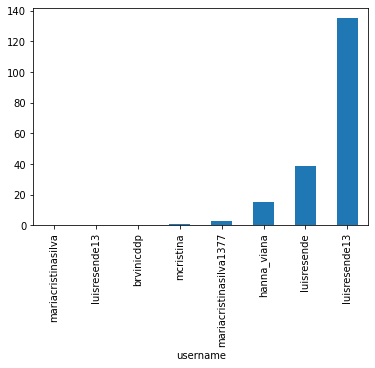

In [46]:
user_entries_cnt.sort_values().plot.bar()

## Extracting Single User Entries as <i>pandas</i> Dataframe

In [80]:
user_entries = df[df['email']=='luisresende@id.uff.br']['entries'].values[0]

In [82]:
entries_df = pd.DataFrame(user_entries)

## Generating week column

In [123]:
datetimeIndex = pd.DatetimeIndex(entries_df['date'])

In [124]:
entries_df['week'] = datetimeIndex.week
entries_df['day'] = datetimeIndex.day
entries_df['month'] = datetimeIndex.month
entries_df['year'] = datetimeIndex.year

## Data Visualization

In [110]:
moodDict = {
    'Ótimo': 5,
    'Bem': 4,
    'Regular': 3,
    'Mal': 2,
    'Horrível': 1
}
moodMap = lambda mood: moodDict[mood]

In [119]:
current = {
    'day': 13,
    'week': 11,
    'month': 3,
    'year': 2022
}

In [134]:
moods = entries_df['mood'].map(moodMap)
moods.index = datetimeIndex

In [138]:
moods[datetimeIndex=='14-03-2022']

date
2022-03-14    3
2022-03-14    5
2022-03-14    5
2022-03-14    2
2022-03-14    3
Name: mood, dtype: int64